# Lab 6: Statistical Inference for Proportions
## Name
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns

# Exercise 1

What do you expect to see in this data? Make some predictions about the statistics.

---

Type your response here.

In [2]:
race_justice = pd.read_csv("race_justice.csv", na_values='NaN')

race_justice

,race_eth,response
0,White,Yes
1,White,Yes
2,White,Yes
3,White,Yes
4,White,Yes
...,...,...
1054,Other,Not sure
1055,Other,Not sure
1056,Other,Not sure
1057,Other,Not sure


# Exercise 2

Construct a bootstrap distribution using the variable name bootstrap_dist_yes in a histogram for the proportion of people who responded yes to the survey. Use this to find a 95% confidence interval.

---

Type your response here.

The observed proportion of people who believe that Blacks and Whites receive equal treatment from the police is 0.22285174693106705


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

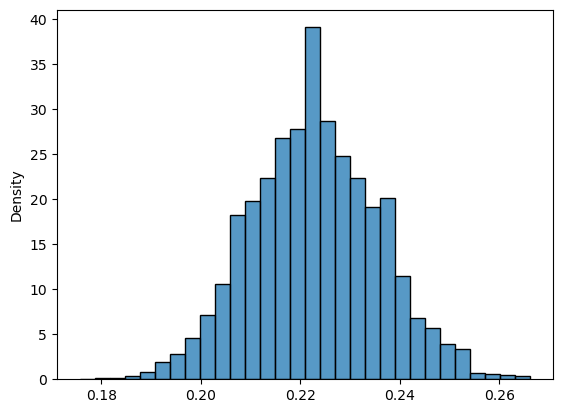

In [3]:
p_yes = race_justice['response'].value_counts(normalize=True)['Yes']
SE = ((p_yes * (1 - p_yes))/len(race_justice))**0.5
print("The observed proportion of people who believe that Blacks and Whites receive equal treatment from the police is", p_yes)

bootstrap_dist_yes = []

for x in range(10000):
    simulated_responses = pd.DataFrame().assign(response=race_justice['response'].sample(frac=1, replace=True, ignore_index=True))
    bootstrap_dist_yes.append(simulated_responses['response'].value_counts(normalize=True)['Yes'])

bootstrap_dist_yes.sort()
sns.histplot(data=bootstrap_dist_yes, bins=30, label='bootstrap distribution', stat='density')

# Exercise 3

How do the bootstrap distribution and the mathematical model compare? If the align, why do you think they do so? If not, why are they different? Hint: You may need to adjust the number of bins in the histogram.

---

Type your response here.

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


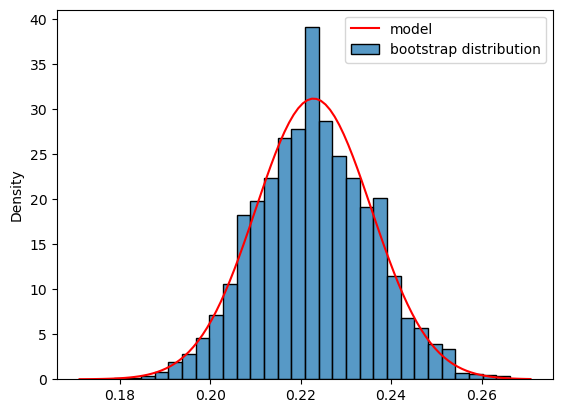

In [4]:
ax = sns.histplot(data=bootstrap_dist_yes, bins=30, label='bootstrap distribution', stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x=x_pdf, loc=p_yes, scale=SE)

ax.plot(x_pdf, y_pdf, color='red', label='model')                                                   
ax.legend()

# Exercise 4

Compare the confidence intervals constructed from the bootstrap distribution and the mathematical model.

---

Type your response here.

In [5]:
print("The 95% confidence interval from bootstrapping is: [", bootstrap_dist_yes[int(0.025*len(bootstrap_dist_yes))], ",", bootstrap_dist_yes[int(0.975*len(bootstrap_dist_yes))], "]")
print("The 95% confidence interval from the model is:", st.norm.interval(confidence=0.95, loc=p_yes, scale=SE))

The 95% confidence interval from bootstrapping is: [ 0.19830028328611898 , 0.24834749763928235 ]
The 95% confidence interval from the model is: (0.19778718780663276, 0.24791630605550133)


# Exercise 5

What are the hypotheses for a hypothesis test to see if there is a difference in opinions between Black and White people? Should this be a one-tailed or two-tailed test? Why?

---

Type your response here.

# Exercise 6

How do the randomized distribution and the mathematical model compare? If the align, why do you think they do so? If not, why are they different? Hint: You may need to adjust the number of bins in the histogram.

---

Type your response here.

The difference in observed proportions of Black people vs White people who believe that Blacks and Whites receive equal treatement from the police is -0.2009567537064587


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


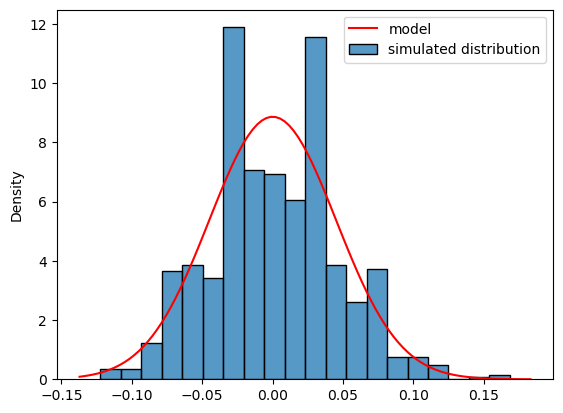

In [6]:
race_justice_bw = race_justice[(race_justice.race_eth == "Black") | (race_justice.race_eth == "White")]

p_black_yes = race_justice_bw.groupby('race_eth')['response'].value_counts(normalize=True)[('Black', 'Yes')]
p_white_yes = race_justice_bw.groupby('race_eth')['response'].value_counts(normalize=True)[('White', 'Yes')]
p_diff = p_black_yes - p_white_yes
print("The difference in observed proportions of Black people vs White people who believe that Blacks and Whites receive equal treatement from the police is", p_diff)

sim_difference = []

for x in range(1000):
    sim_one_mix = pd.DataFrame().assign(race_eth=race_justice_bw['race_eth'], response=race_justice_bw['response'].sample(frac=1, ignore_index=True))
    sim_difference.append(sim_one_mix.groupby('race_eth')['response'].value_counts(normalize=True)[('Black','Yes')] - sim_one_mix.groupby('race_eth')['response'].value_counts(normalize=True)[('White','Yes')])

ax = sns.histplot(data=sim_difference, bins=20, label="simulated distribution", stat='density')

n_black = race_justice_bw['race_eth'].value_counts()[('Black')]
n_white = race_justice_bw['race_eth'].value_counts()[('White')]
p_pool = (p_black_yes * n_black + p_white_yes * n_white)/(n_black + n_white)
SE = (p_pool * (1 - p_pool) * (1/n_black + 1/n_white))**0.5

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.norm.pdf(x_pdf, loc=0, scale=SE)

ax.plot(x_pdf, y_pdf, color='red', label='model')                                                   
ax.legend()

# Exercise 7

Create a histogram using 1,000 simulations. Describe the shape of the histogram. Does the histogram appear to follow the normal model? Why or why not?

---

Type your response here.

In [7]:
crosstab = pd.crosstab(race_justice['race_eth'], race_justice['response'])

print("The observed chi-squared value for this table is:", st.chi2_contingency(crosstab).statistic)

crosstab

The observed chi-squared value for this table is: 53.96431970400944


response,No,Not sure,Yes
race_eth,,,
Black,92,3,6
Hispanic,75,14,15
Other,47,21,14
White,486,85,201


C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

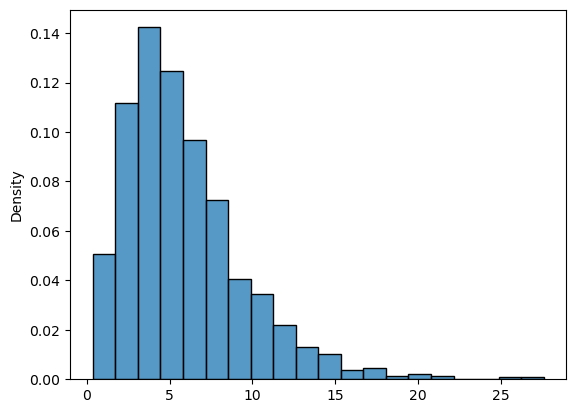

In [8]:
sim_crosstab = []

for x in range(1000):
    sim_survey = pd.DataFrame().assign(race_eth=race_justice['race_eth'], response=race_justice['response'].sample(frac=1, ignore_index=True))
    sim_crosstab.append(st.chi2_contingency(pd.crosstab(sim_survey['race_eth'], sim_survey['response'])).statistic)

sns.histplot(data=sim_crosstab, bins=20, label="simulated distribution", stat='density')

# Exercise 8

How do the randomized distribution and the mathematical model compare? If the align, why do you think they do so? If not, why are they different? Hint: You may need to adjust the number of bins in the histogram.

---

Type your response here.

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


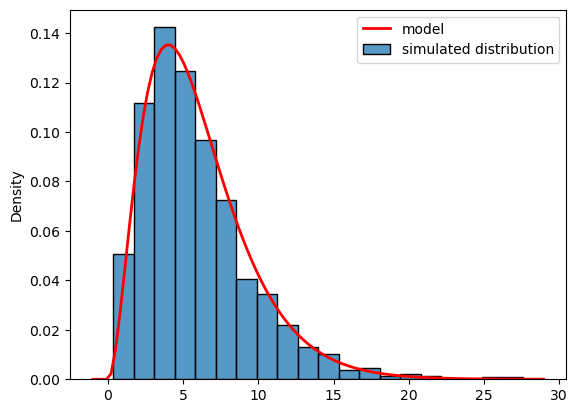

In [9]:
ax = sns.histplot(data=sim_crosstab, bins=20, label="simulated distribution", stat='density')

x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = st.chi2.pdf(x_pdf, df=st.chi2_contingency(crosstab).dof)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='model')                                                   
ax.legend()

# Exercise 9

Interpret these results in the context given. What does this say about how different people respond to the question "Do you think Blacks and Whites receive equal treatment from the police?"

---

Type your response here.

In [10]:
print("The p-value for a chi-squared test from the simulated data is", len([i for i in sim_crosstab if i > st.chi2_contingency(crosstab).statistic]) / len(sim_crosstab))

The p-value for a chi-squared test from the simulated data is 0.0


# Exercise 10

Reflect on what you expected to see from exercise 1 and what the statistics have now illuminated. How do these statistics help your understanding of issues of race and police brutality? What additional data would you be interested in to expand your understanding further?

---

Type your response here.